## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read titanic data
ti = pd.read_csv('titanic.csv')

In [4]:
# Determine if the survival rate is associated to the class of passenger
# Determine if the survival rate is associated to the gender
# Determine the survival rate is associated to the age

In [56]:
 # Determine if there is a statistically significant association
def func_chi2(p,A,B):
    '''
    Determine if there is a statistically significant association
   
   Input:
   p value, float
   
   output:
   There is a/no statistically significant association between passenger class and survival
    
    '''
    alpha = 0.05  # level of significance 5%
    print('p value = ',p)
    if p < alpha:
        result = "There is a statistically significant association between %s and %s." % (A,B)
    else:
        result = "There is no statistically significant association between %s and %s." % (A,B)
        
    return result

In [57]:
# Determine if the survival rate is associated to the class of passenger
# create a two-way table
pt_sur_cls = pd.crosstab(ti['Pclass'],ti['Survived'])

chi_square,p,df,ef = chi2_contingency(pt_sur_cls)

func_chi2(p,'class','survival')

p value =  4.549251711298793e-23


'There is a statistically significant association between class and survival.'

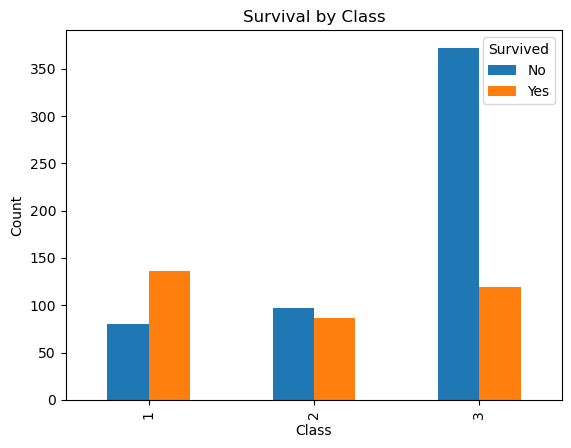

In [6]:
pt_sur_cls.plot(kind='bar',stacked=False)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Survival by Class')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

In [7]:
ti.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
# Determine if the survival rate is associated to the gender
table_gender_sur = pd.crosstab(ti['Sex'],ti['Survived'])
table_gender_sur

Survived,0,1
Sex,,
female,81,233
male,468,109


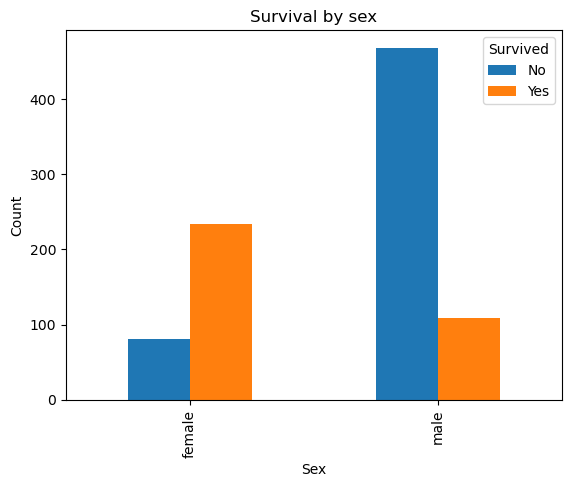

In [16]:
# draw plot of gender and survival rate
table_gender_sur.plot(kind='bar',stacked=False)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival by sex')
plt.legend(title='Survived',labels=['No','Yes'])
plt.show()

In [58]:
chi2_gen_sur,p_gen_sur,df_gender_sur,ef_gen_sur = chi2_contingency(table_gender_sur)

func_chi2(p_gen_sur,'gender','survival')

p value =  1.1973570627755645e-58


'There is a statistically significant association between gender and survival.'

In [63]:
ti['Age'].fillna('NULL',inplace=True)

In [64]:
def func_age_group(row):
    '''
    group age to 0-20,21-40,41-60,60+
    '''
    if row['Age'] == 'NULL':
        return 'NO AGE RECORD'
    elif row['Age'] < 20:
        return '0-20'
    elif row['Age'] <40:
        return '21-40'
    elif row['Age'] < 60:
        return '41-60'
    else:
        return '60 +'

In [65]:
ti['Age_group'] = ti.apply(func_age_group,axis=1)

In [66]:
ti['Age_group'].unique()

array(['21-40', 'NO AGE RECORD', '41-60', '0-20', '60 +'], dtype=object)

In [67]:
table_age_sur = pd.crosstab(ti['Age_group'],ti['Survived'])
table_age_sur

Survived,0,1
Age_group,,
0-20,85,79
21-40,237,150
41-60,83,54
60 +,19,7
NO AGE RECORD,125,52


In [68]:
table_age_sur.sum()

Survived
0    549
1    342
dtype: int64

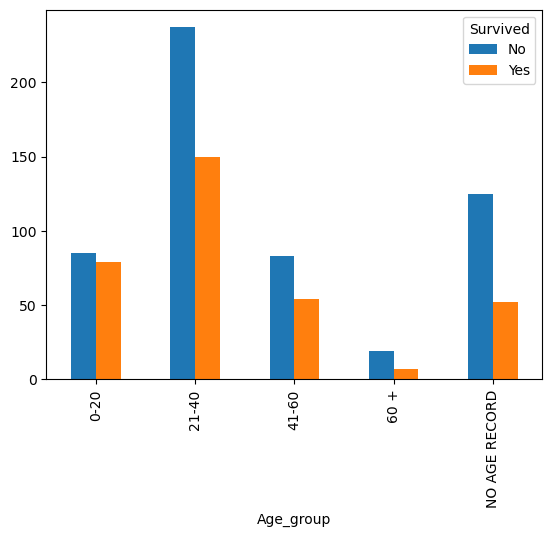

In [69]:
table_age_sur.plot(kind='bar',stacked=False)
plt.xlabel = 'Age Group'
plt.ylabel = 'Count'
plt.title = 'Survival by Age Group'
plt.legend(title='Survived',labels = ['No','Yes'])
plt.show()

In [70]:
chi2_age_sur,p_age_sur,df_age_sur,ef_age_sur = chi2_contingency(table_age_sur)

In [71]:
func_chi2(p_age_sur,'Age','Survival Rate')

p value =  0.006567715904169939


'There is a statistically significant association between Age and Survival Rate.'